# mehmetfatihdata

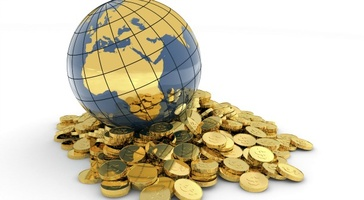

In [1]:
from IPython.display import Image, display
display(Image(filename = 'africa-4.jpg'))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [3]:
df = pd.read_csv('african_crises.csv')
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
print("Checking the columns in the dataset.")
df.columns

Checking the columns in the dataset.


Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [5]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


Dataset is non-uniform and recently formed countries have least data.


Text(0, 0.5, '')

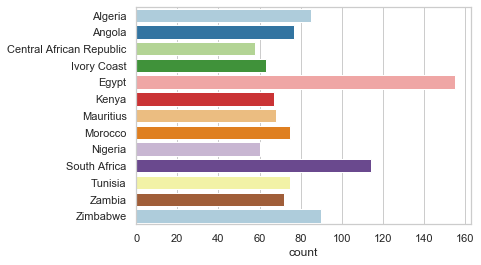

In [6]:
print("Dataset is non-uniform and recently formed countries have least data.")
sns.countplot(y='country',data=df, palette="Paired")
plt.ylabel(None)

In [7]:
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [8]:
print("The prediction variable is imbalanced.")
df.banking_crisis.value_counts()

The prediction variable is imbalanced.


no_crisis    965
crisis        94
Name: banking_crisis, dtype: int64

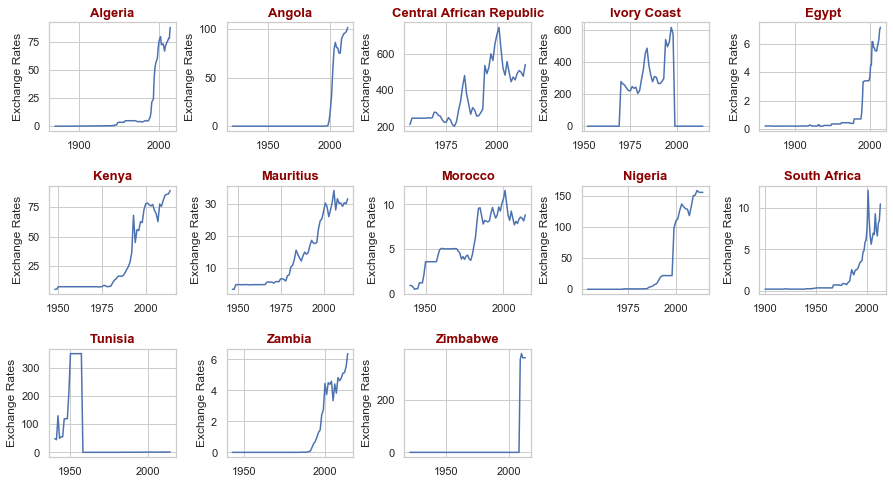

In [9]:
#The inflation is a good indicator for economic health for the country
plt.figure(figsize=(15,8))
count = 1
for country in df.country.unique():
    plt.subplot(len(df.country.unique())/4,5,count)
    count+=1
    sns.lineplot(df[df.country==country]['year'],df[df.country==country]['exch_usd'])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    plt.xlabel(None)
    plt.ylabel('Exchange Rates')
    plt.title(country,baslik_font)

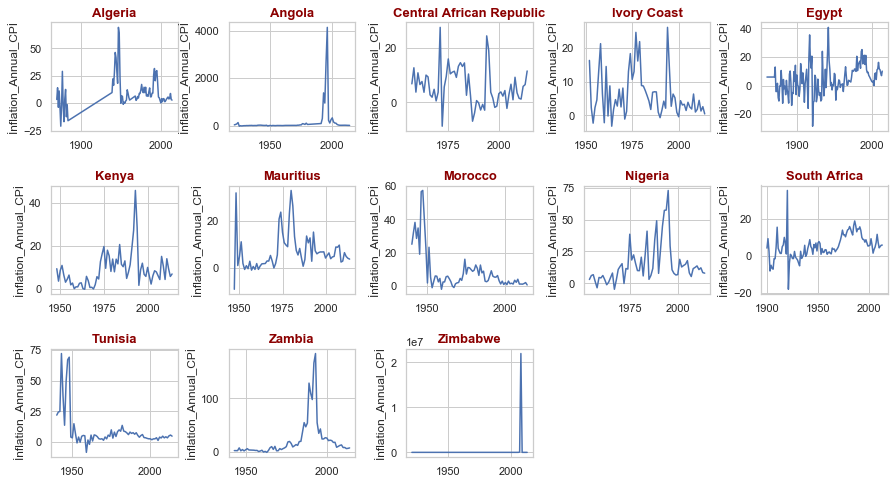

In [10]:
#The inflation is a good indicator for economic health for the country
plt.figure(figsize=(15,8))
count = 1
for country in df.country.unique():
    plt.subplot(len(df.country.unique())/4,5,count)
    count+=1
    sns.lineplot(df[df.country==country]['year'],df[df.country==country]['inflation_annual_cpi'])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    plt.xlabel(None)
    plt.ylabel('İnflation_Annual_CPİ')
    plt.title(country,baslik_font)

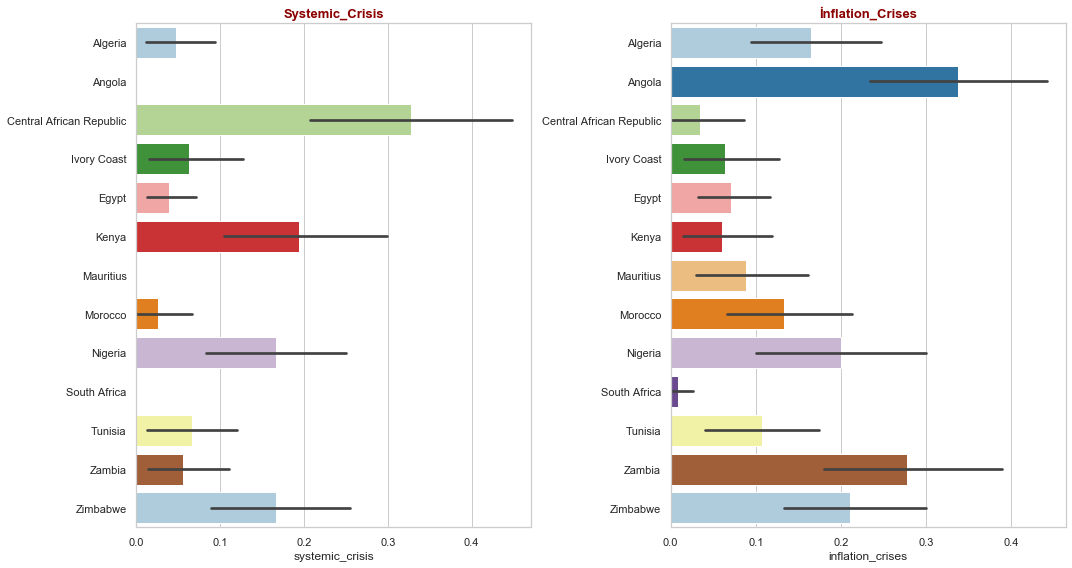

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.barplot(y='country',x='systemic_crisis',data=df, palette='Paired')
plt.ylabel(None)
plt.title("Systemic_Crisis", fontdict=baslik_font)
plt.subplot(122)
plt.title("İnflation_Crises", fontdict=baslik_font)
sns.barplot(y='country',x='inflation_crises',data=df,palette='Paired')
plt.ylabel(None)
plt.tight_layout()

Text(0.5, 1.0, 'Banking_Crises')

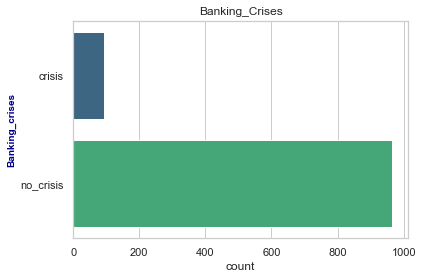

In [12]:
sns.countplot(y='banking_crisis',data=df, palette='viridis')
plt.ylabel("Banking_crises", eksen_font)
plt.title("Banking_Crises")

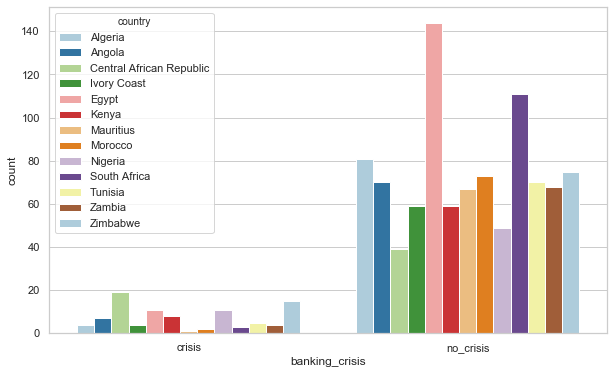

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='banking_crisis', hue='country', data=df, palette='Paired')

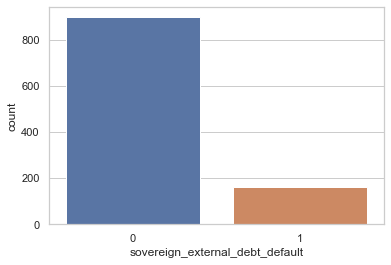

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='sovereign_external_debt_default', data=df)

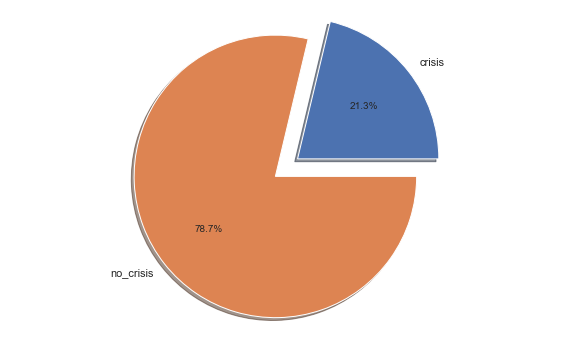

Text(0.5, 1.0, 'Pie chart representation of Banking_crisis')

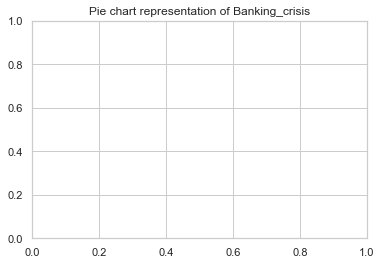

In [15]:
gen_crises = df.pivot_table('exch_usd', index='banking_crisis', aggfunc='sum')
x = gen_crises.index.values
y = gen_crises.values
y = y.reshape(2,)

fig, ax = plt.subplots(figsize=(10,6))
explode = (0.1,0.1)
ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=0)
ax.axis('equal')
plt.show()
plt.title('Pie chart representation of Banking_crisis')

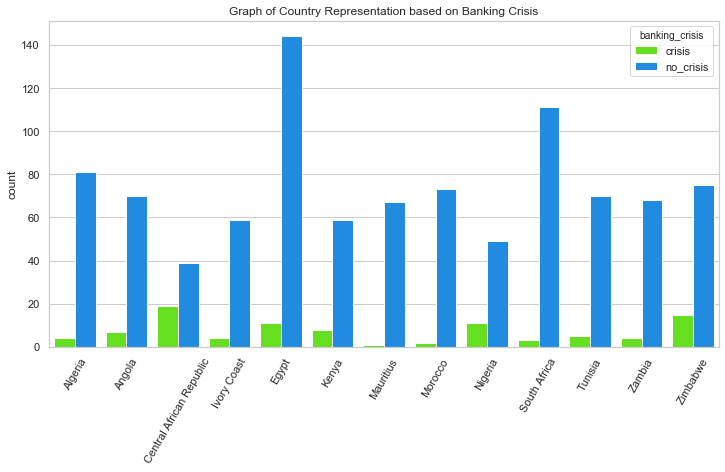

In [16]:
# Let me visualize the country that has high number of crises 
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='country', data=df, palette='gist_rainbow', hue='banking_crisis')
plt.title('Graph of Country Representation based on Banking Crisis')
plt.xticks(rotation = 60)
plt.xlabel(None)
plt.show()

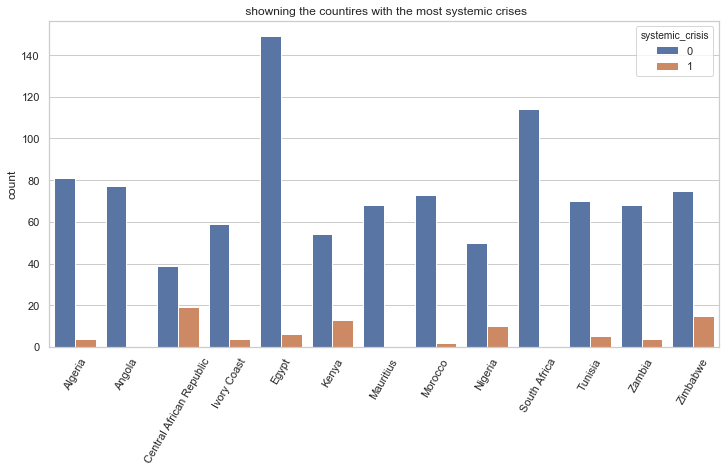

In [17]:
# Let me visualize the country that has high number of crises 
plt.figure(figsize = (12, 6))
sns.countplot(x= 'country', hue = 'systemic_crisis', data = df)
plt.title(' showning the countires with the most systemic crises')
plt.xticks(rotation = 60)
plt.xlabel(None)
plt.show()

In [18]:
df.corr()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376


(0, 11)

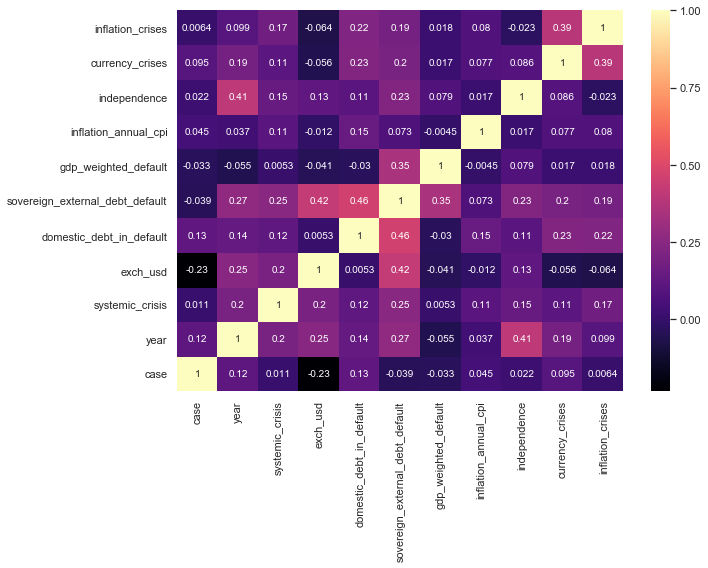

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='magma', annot=True)
plt.ylim(0,11)

In [20]:
feature_importances = pd.Series(rf_model.feature_importances_, index = X.columns)
print(feature_importances)
feature_importances.sort_values(inplace = True)
feature_importances.plot(kind ='barh', figsize = (10,6))

NameError: name 'rf_model' is not defined


From what we can see above Systemic_crisis is a major cause of banking crisis in Africa. So when govenments and govenment institutions making monetry polices fail there is a very high likelyhood that there will be banking crises in the country.

This is followed by Exchange rate to the US dollar and the rise of inflation in the country